# ARIMA (Autoregressive integrated moving average)

https://cienciadedatos.net/documentos/py51-modelos-arima-sarimax-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../datasets/AirPassengers.csv',  index_col = 'Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

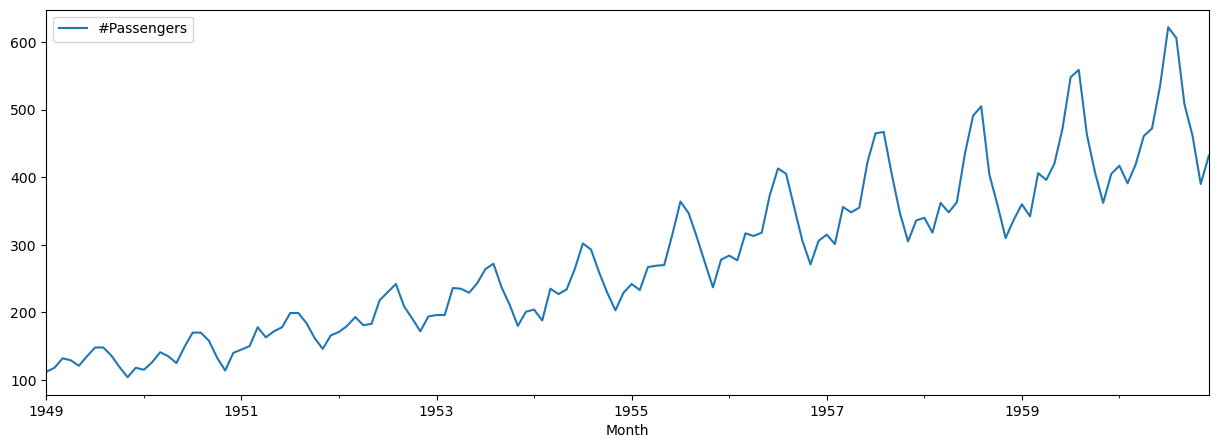

In [2]:
df.plot(figsize=(15, 5))

<Axes: xlabel='Month'>

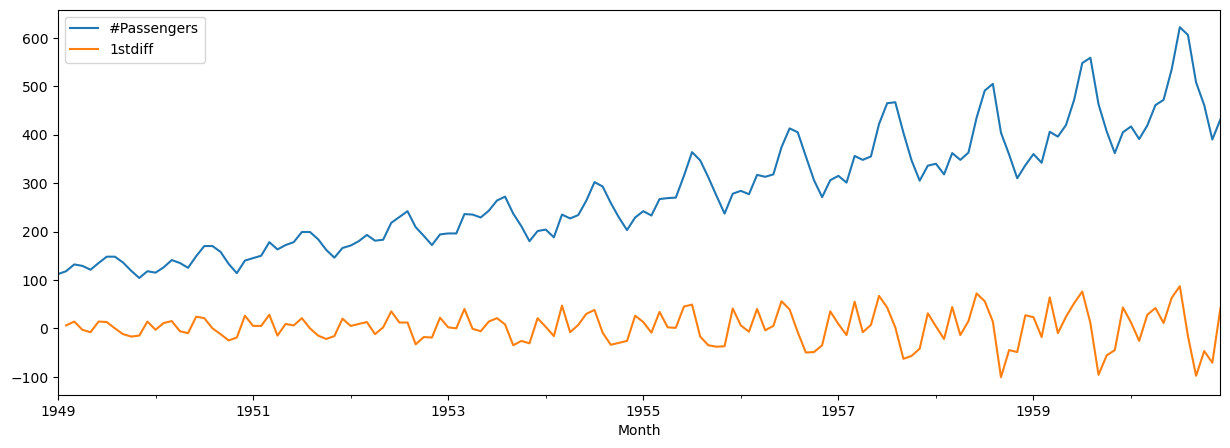

In [3]:
#Differencia de primer orden
df['1stdiff'] = df['#Passengers'].diff()
df.plot(figsize=(15, 5))

No es estacionarioa ya que tiene estacionalidad que crece con el tiempo

<Axes: xlabel='Month'>

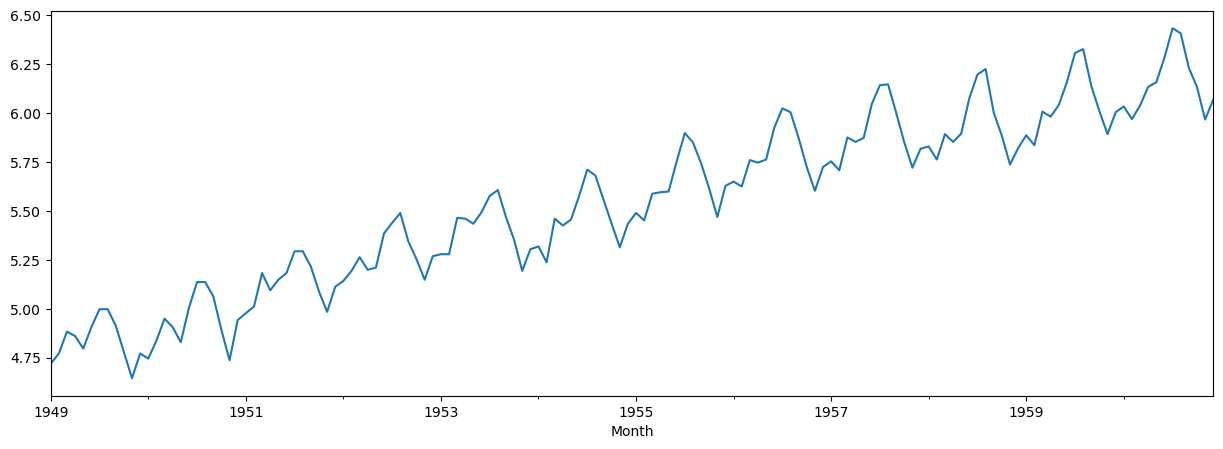

In [4]:
df['LogPassengers'] = np.log(df['#Passengers'])
df['LogPassengers'].plot(figsize=(15, 5))

Crece mas lento yla estacionalidad es casi constante

In [5]:
from statsmodels.tsa.arima.model import ARIMA


In [6]:
# Train a tes data
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

<Axes: xlabel='Month'>

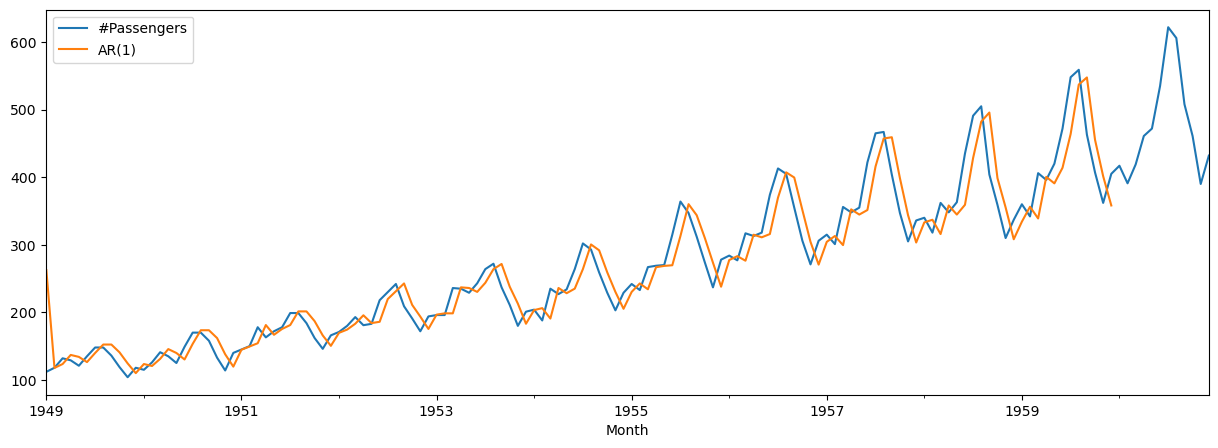

In [7]:
#ARIMA(p,d,q)->order(1,0,0)=AR(1)
arima = ARIMA(train['#Passengers'], order=(1,0,0))
#fit de lapredicción de arima sobrelosdatos de passenger
arima_result = arima.fit()
#guardar valor
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1])
#graficar train 
df[['#Passengers', 'AR(1)']].plot(figsize=(15, 5))

<Axes: xlabel='Month'>

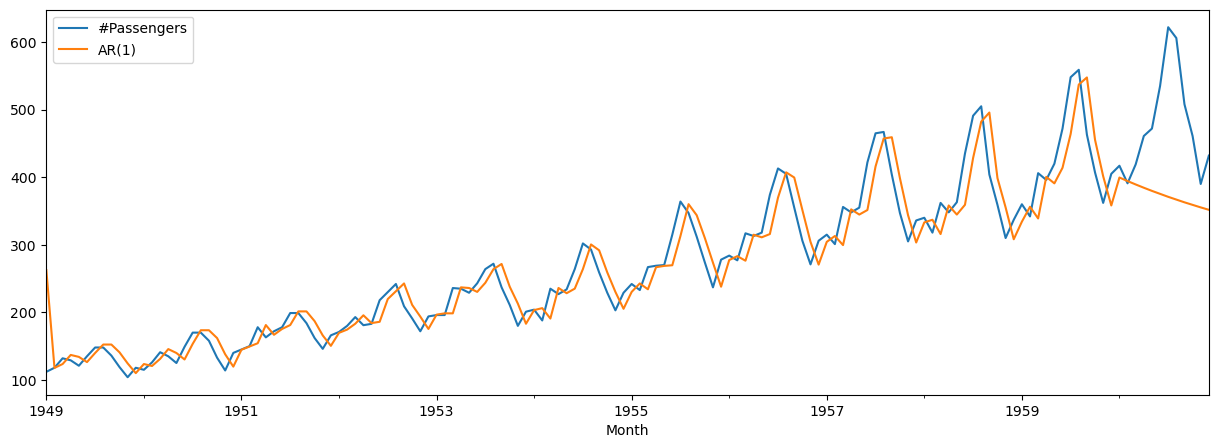

In [8]:
#Predicción de ARIMA para los datosde prueba
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
#type(prediction_result)
#guardar valor
df.loc[test_idx, 'AR(1)'] = forecast
#graficar
df[['#Passengers', 'AR(1)']].plot(figsize=(15, 5))

Muy mala predicción, va en ladirección opuesta. La predicción Naive era mejor

In [9]:
#Intervalo de confianza
prediction_result.conf_int()

,lower #Passengers,upper #Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [10]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['#Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower #Passengers'], conf_int['upper #Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

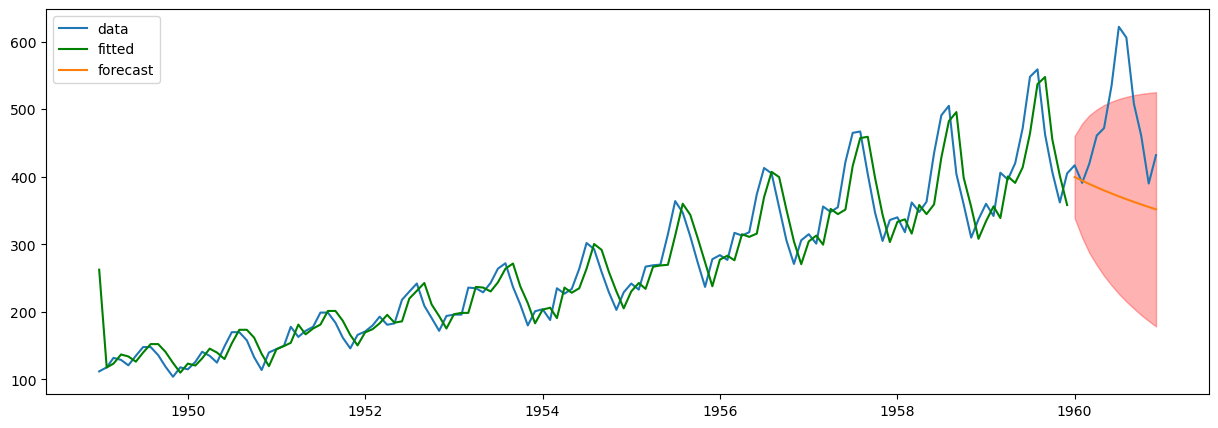

In [11]:
plot_fit_and_forecast(arima_result)

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


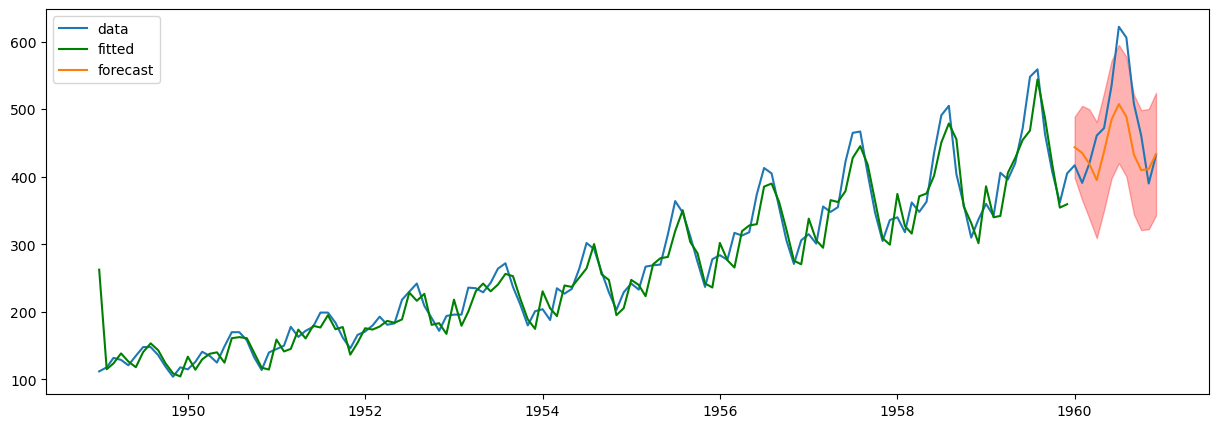

In [12]:
#ARIMA(p,d,q)->order(10,0,0)=AR(10)
arima = ARIMA(train['#Passengers'], order=(10,0,0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

El modeloaprende que la señal es periódica, 
pero subestimada

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


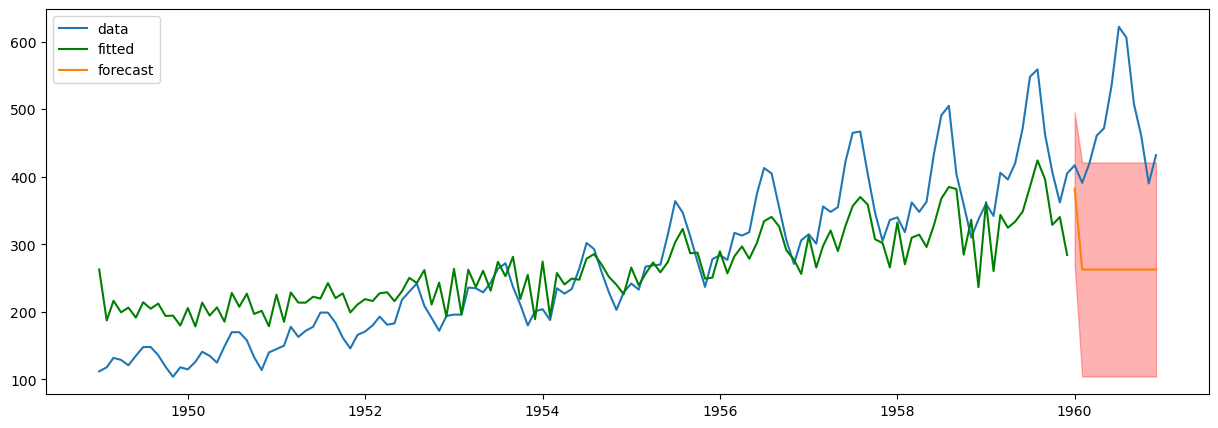

In [13]:
#ARIMA(p,d,q)->order(0,0,1)=MA(1)
arima = ARIMA(train['#Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

Peor que AR(1)

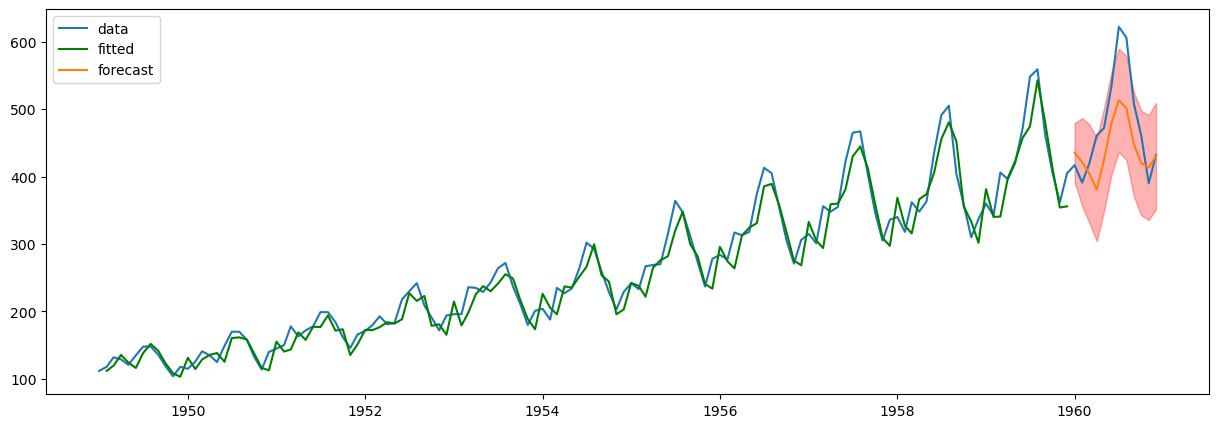

In [14]:
arima = ARIMA(train['#Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()
#Función con 3 parámetros
def plot_fit_and_forecast_int(result, d, col='#Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

## Que pasa si ahora utilizamos log?

<Axes: xlabel='Month'>

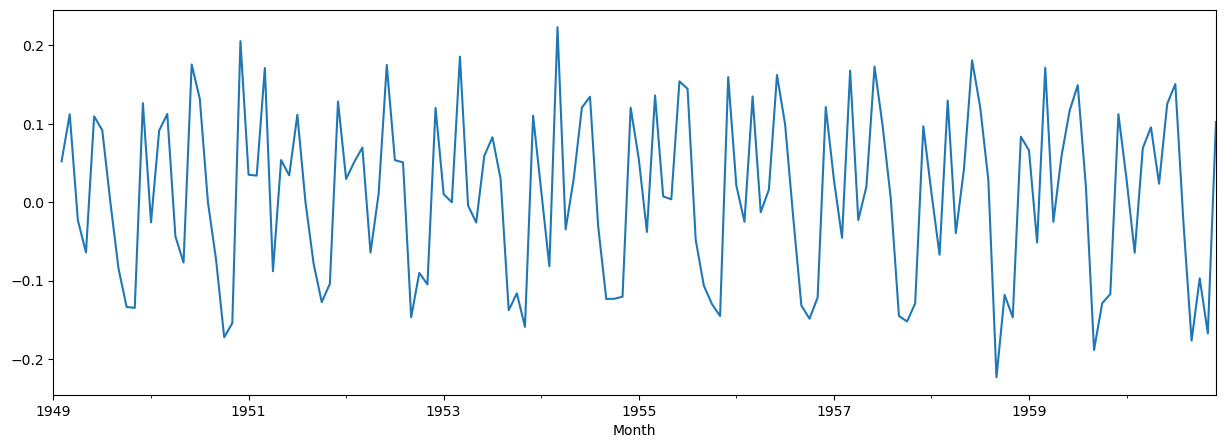

In [15]:
#Differencia de primer orden log
df['Log1stDiff'] = df['LogPassengers'].diff()
df['Log1stDiff'].plot(figsize=(15, 5))

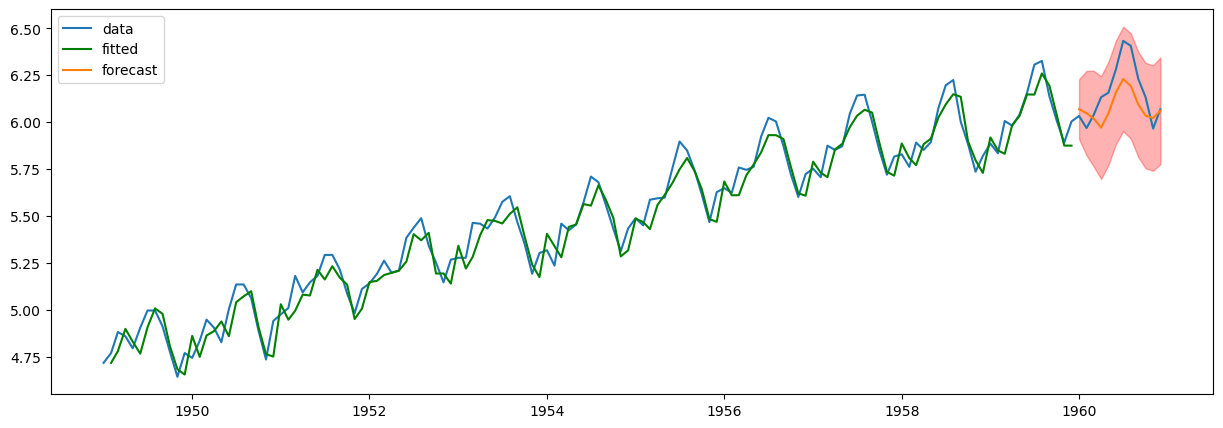

In [16]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

Peor resultado que los datos sin log

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


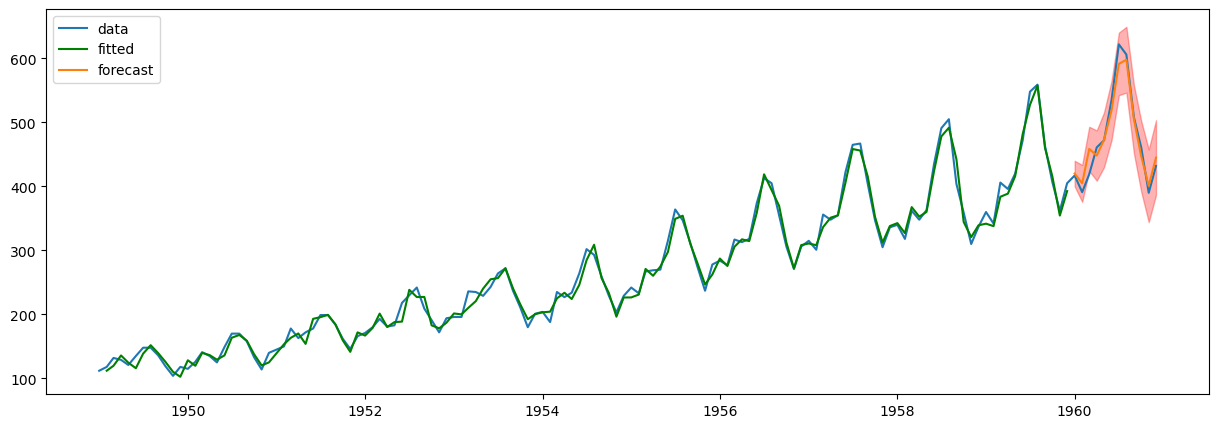

In [17]:
#Mas terminos (12 = tamaño delperiodo)
arima = ARIMA(train['#Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='#Passengers')

/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


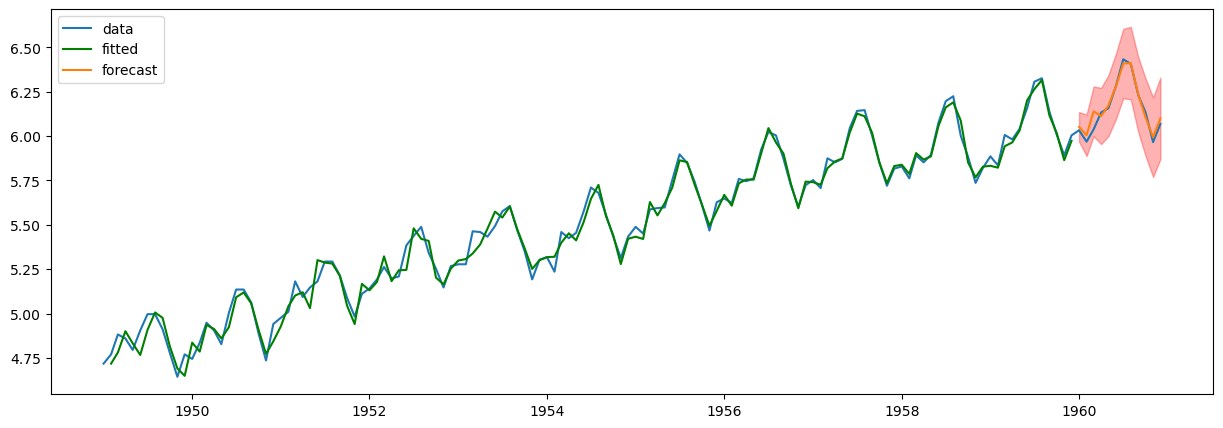

In [18]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [19]:
#Métrica
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
#Escala original
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['#Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [20]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.06458996764054
ARIMA(8,1,1) logged: 61.60694094843056
ARIMA(12,1,0): 17.516695797494364
ARIMA(12,1,0) logged: 16.105657976038373


ARIMA(12,1,0) log es la mejor predicción!!!!!

# Estacionalidad

ADF test: https://support.minitab.com/es-mx/minitab/21/help-and-how-to/statistical-modeling/time-series/how-to/augmented-dickey-fuller-test/methods-and-formulas/methods-and-formulas/

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html




In [21]:
'''
Augmented Dickey-Fuller test 

statsmodels.tsa.stattools.adfuller(
    x,                #data
    maxlag=None, 
    regression='c', 
    autolag='AIC', 
    store=False, 
    regresults=False)

return:
(adf,
pvalue,
usedlag,   
nobs,      #number of observations used 
critical value, #Based on MacKinnon (2010)
icbest  #The maximized information criterion 
        if autolag is not None.
)
'''
from statsmodels.tsa.stattools import adfuller


<Axes: xlabel='Month'>

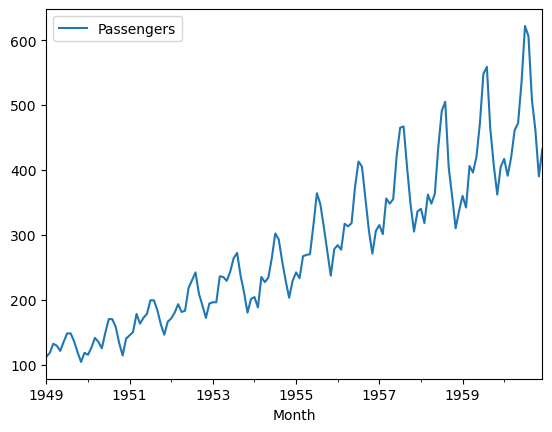

In [22]:
df = pd.read_csv('../datasets/airline_passengers.csv', index_col='Month', parse_dates=True)
df.plot()

In [23]:
adfuller(df['Passengers'])

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [24]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05: #5%
    print("Stationary")
  else:
    print("Non-Stationary")

In [25]:
adf(df['Passengers'])


Test-Statistic: 0.8153688792060498
P-Value: 0.991880243437641
Non-Stationary


Test-Statistic: -10.258116691030446
P-Value: 4.3073766951643696e-18
Stationary


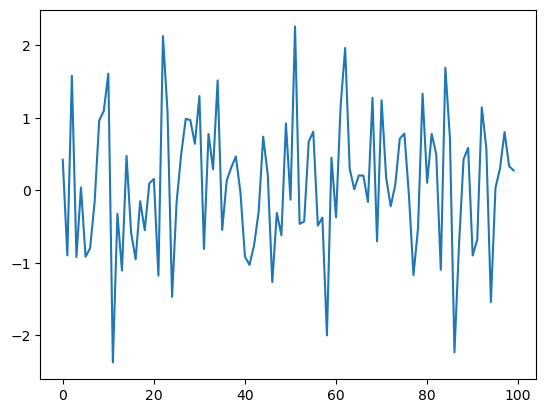

In [26]:
rand = np.random.randn(100)
plt.plot(rand)
adf(rand)

Test-Statistic: -9.115216694728645
P-Value: 3.3164979551114054e-15
Stationary


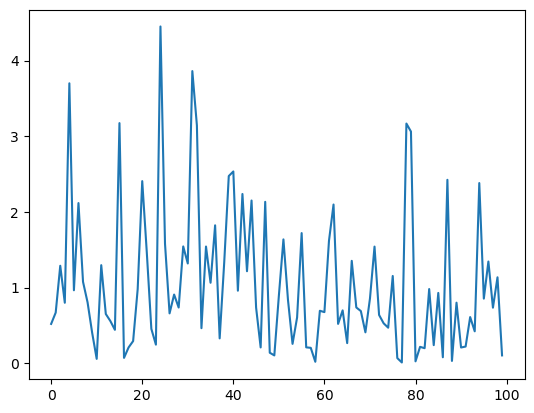

In [27]:
gama = np.random.gamma(1, 1, 100)
plt.plot(gama)
adf(gama)

In [28]:
df['LogPassengers'] = np.log(df['Passengers'])

In [29]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069683
P-Value: 0.4223667747703874
Non-Stationary


Test-Statistic: -2.8292668241700047
P-Value: 0.05421329028382478
Non-Stationary


<Axes: xlabel='Month'>

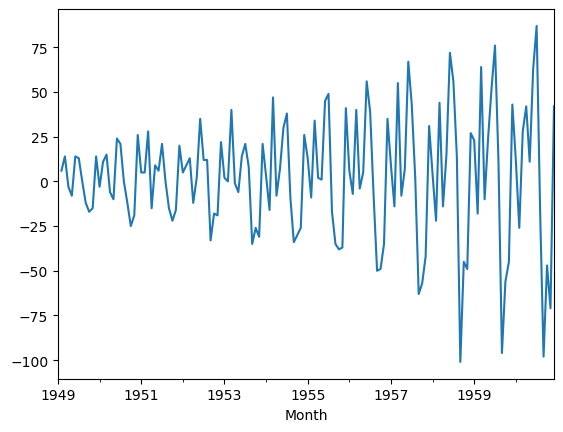

In [30]:
#Usamos en el ajuste de ARIMA
df['Diff'] = df['Passengers'].diff()
adf(df['Diff'].dropna())
df['Diff'].plot()

Test-Statistic: -2.717130598388114
P-Value: 0.07112054815086184
Non-Stationary


<Axes: xlabel='Month'>

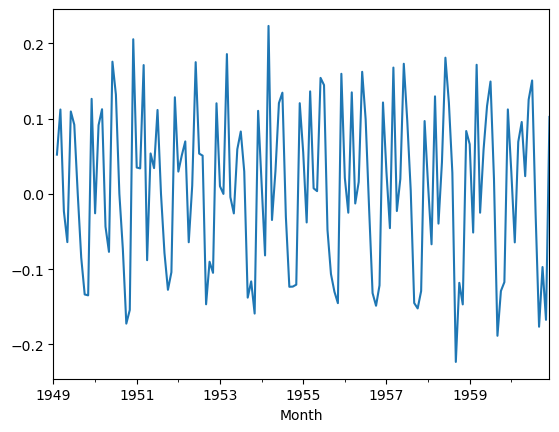

In [31]:
df['DiffLog'] = df['LogPassengers'].diff()
adf(df['DiffLog'].dropna())
df['DiffLog'].plot()

## PACF y ACF

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


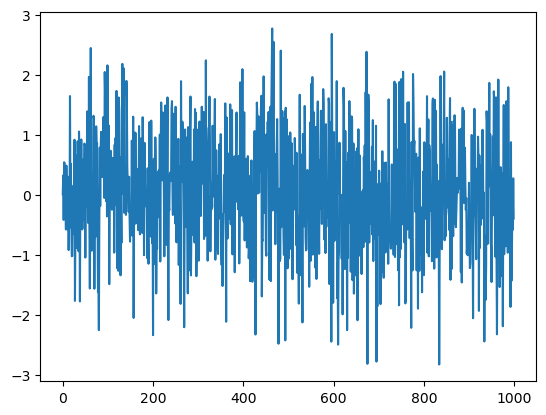

In [33]:
x0 = np.random.randn(1000)
plt.plot(x0)


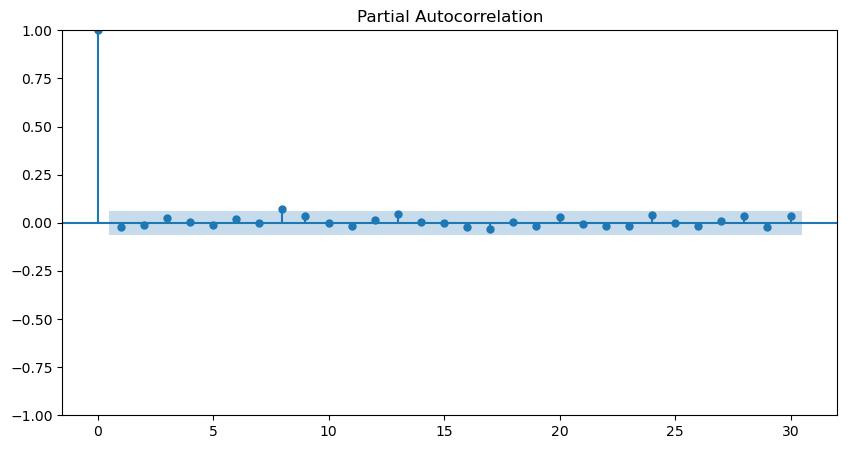

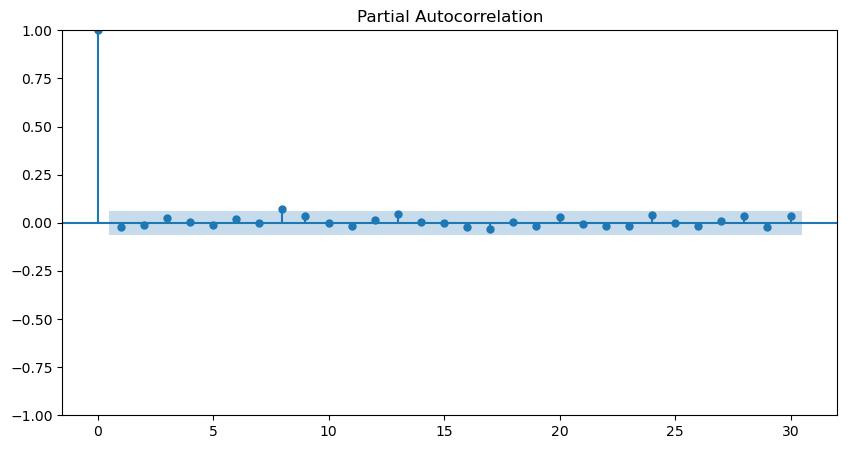

In [34]:
ig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x0, ax=ax)

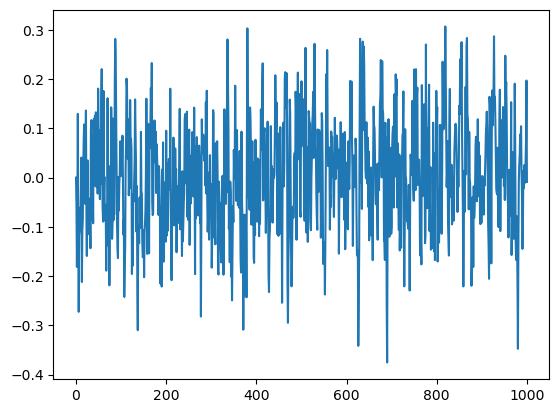

In [35]:
x1 = [0]
for i in range(1000):
  x = 0.5 * x1[-1] + 0.1 * np.random.randn() # depende del punto anterior
  x1.append(x)                               # pendiente positiva
x1 = np.array(x1)
plt.plot(x1)

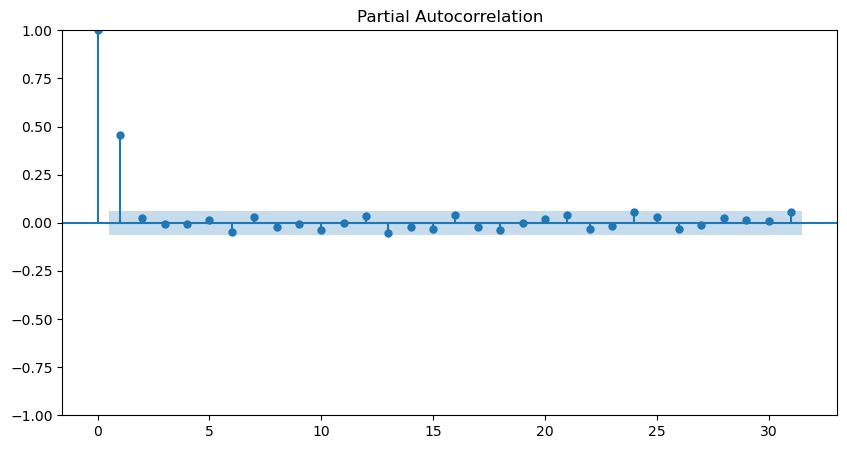

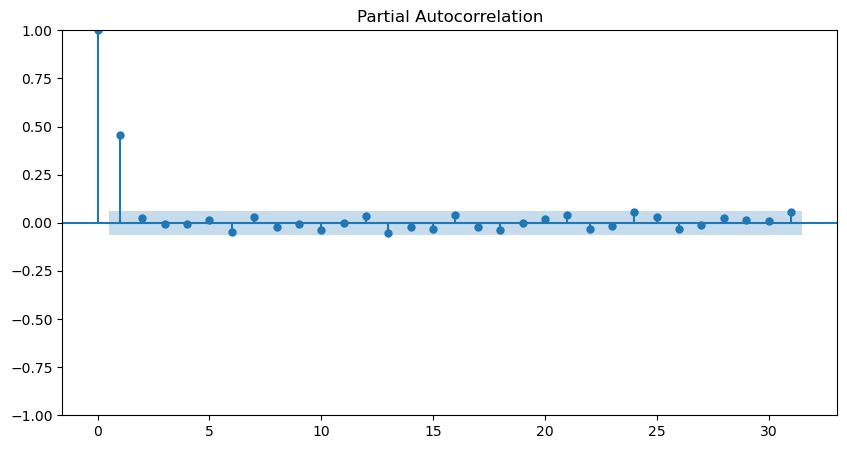

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax)

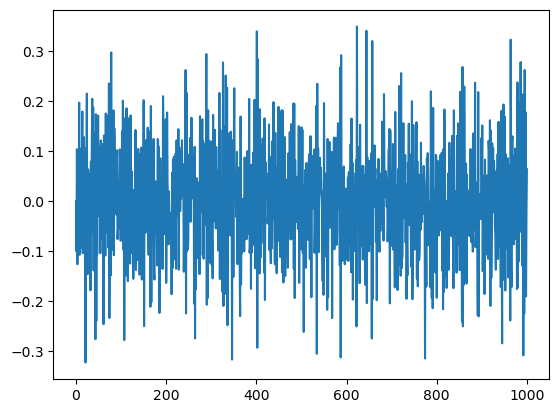

In [37]:
x1 = [0]
for i in range(1000):
  x = -0.5 * x1[-1] + 0.1 * np.random.randn() #pendiente negativa
  x1.append(x)
x1 = np.array(x1)
plt.plot(x1)

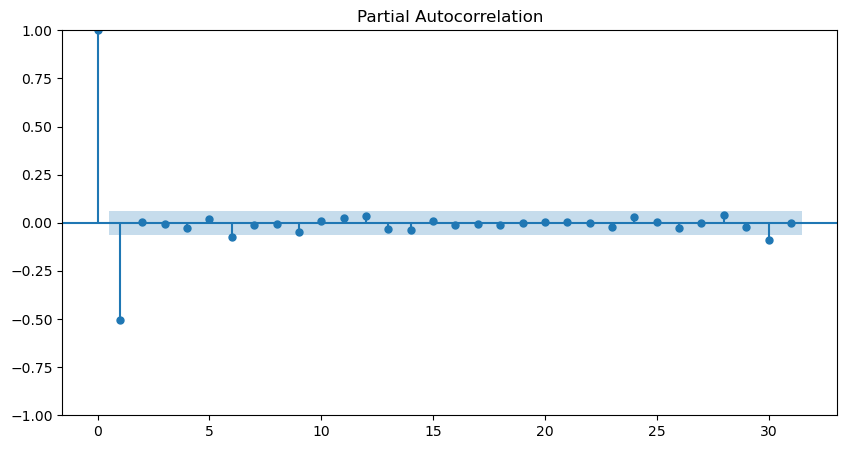

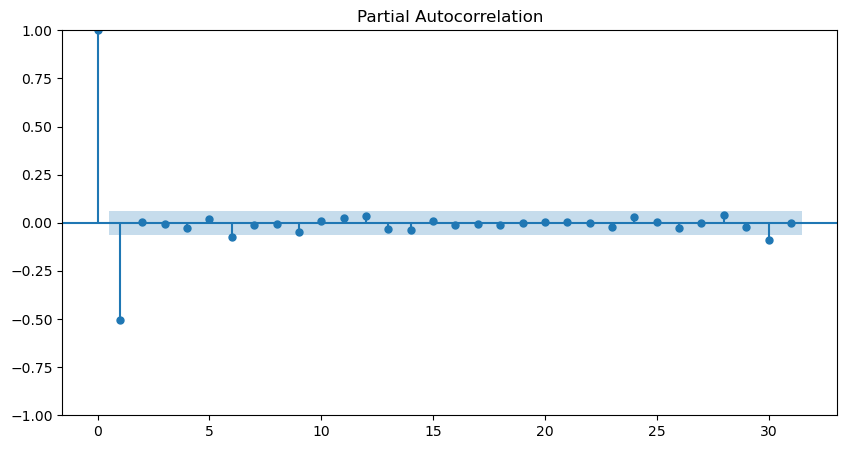

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax)

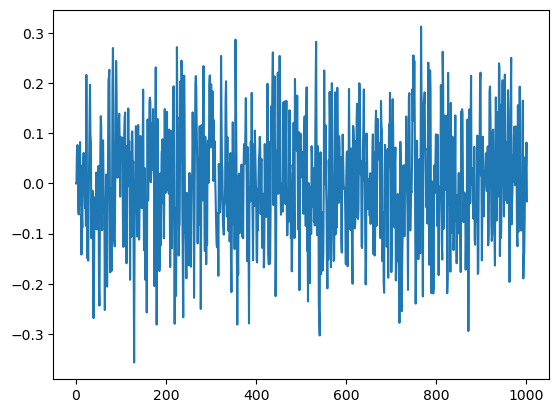

In [39]:
x2 = [0, 0]
for i in range(1000):
  x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1 * np.random.randn() #depende de valores
  x2.append(x)
x2 = np.array(x2)
plt.plot(x2)

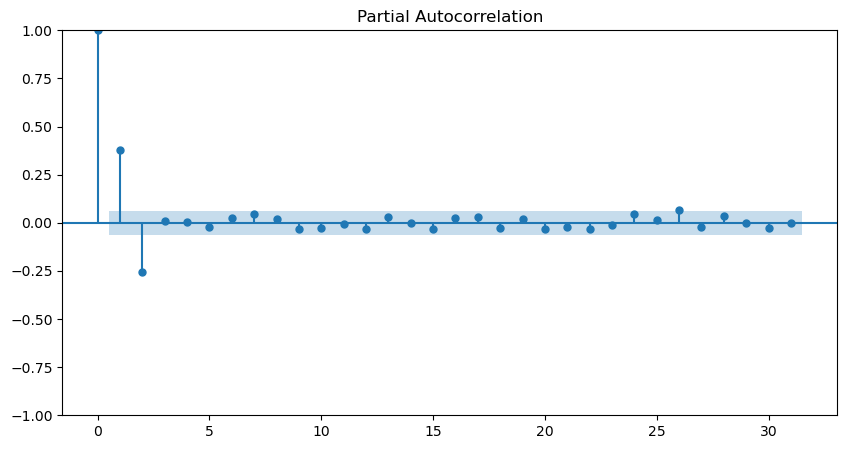

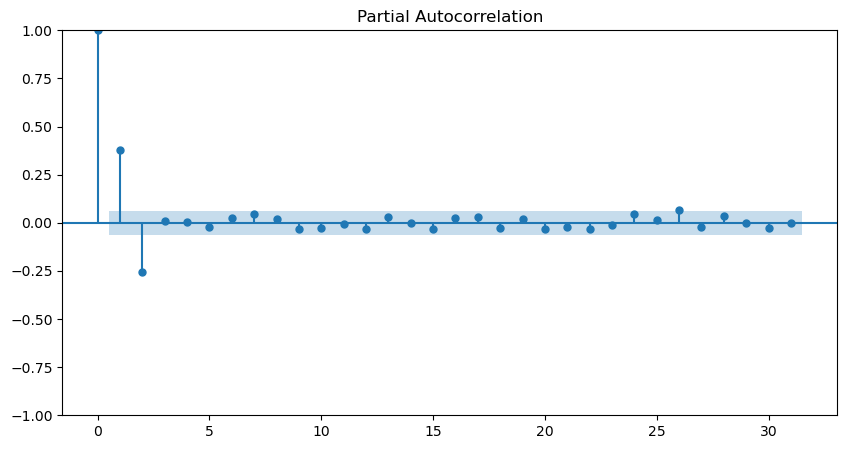

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x2, ax=ax)

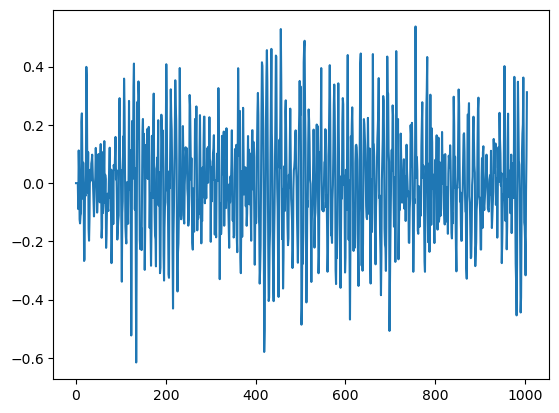

In [41]:
x5 = [0, 0, 0, 0, 0]
for i in range(1000):
  x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 * np.random.randn()
  x5.append(x)
x5 = np.array(x5)
plt.plot(x5)

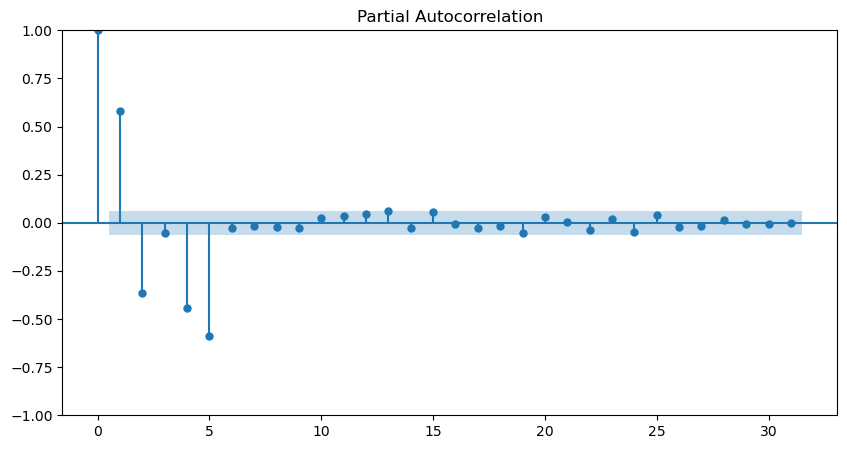

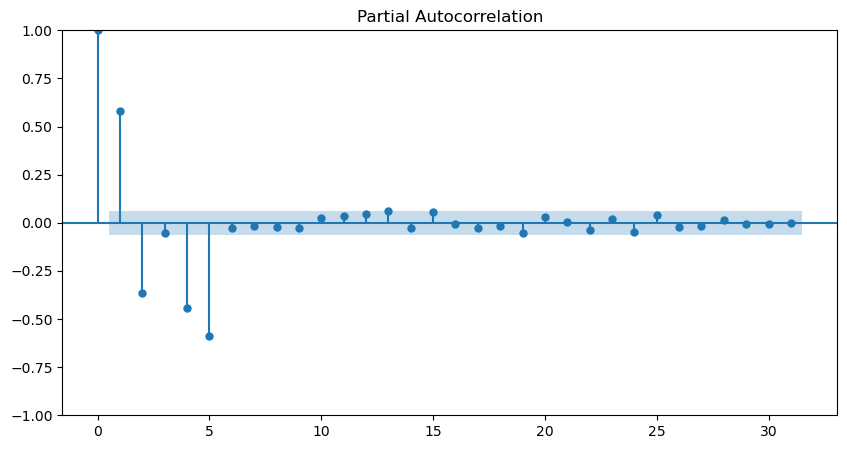

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x5, ax=ax)

## AUTOARIMA

### pmdarima

https://pypi.org/project/pmdarima/

In [43]:
import pmdarima as pm

df = pd.read_csv('../datasets/AirPassengers.csv',  index_col = 'Month', parse_dates=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [44]:
df['LogPassengers'] = np.log(df['#Passengers'])
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [45]:
model = pm.auto_arima(train['#Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=13.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=1.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=3.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=10.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=2.30 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.28 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=1.44 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=4.74 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.18 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=3.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 28 Apr 2024   AIC                            905.686
Time:                                    17:43:30   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)


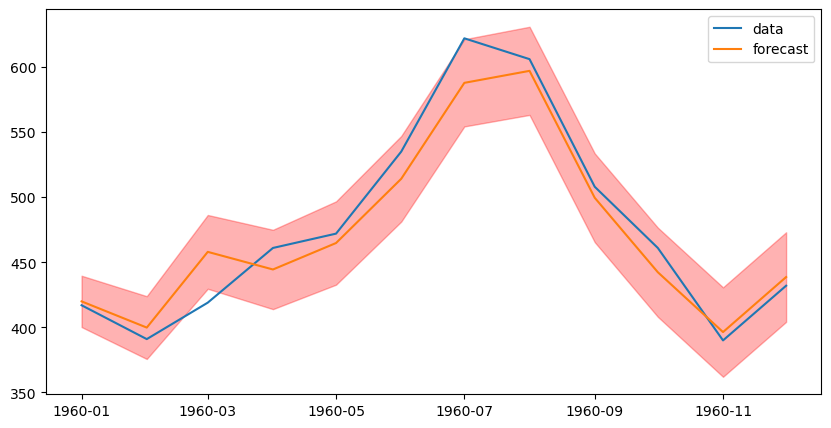

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['#Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

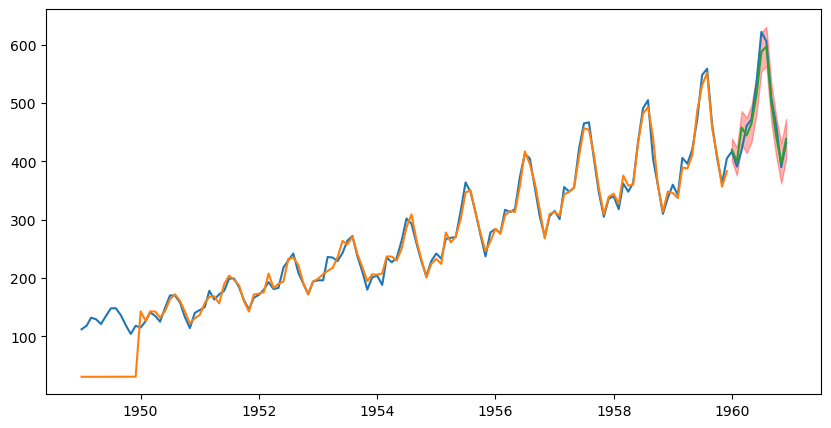

In [49]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['#Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)

In [50]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.249, Time=11.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=8.86 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=2.80 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=10.65 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.61 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=17.01 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.709, Time=10.42 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=18.28 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=12.69 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.27 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.306, Time=6.99 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.327, Time=15.13 sec
 ARIMA(1,0,2)(1,1

In [51]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sun, 28 Apr 2024   AIC                           -448.052
Time:                                      17:48:48   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.009      2.164      0.030       0.002       0.037
ar.L1          0.5992      0.083      7.251      0.000       0.437       0.761
ar.L2          0.2418      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.413      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.188      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.13
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

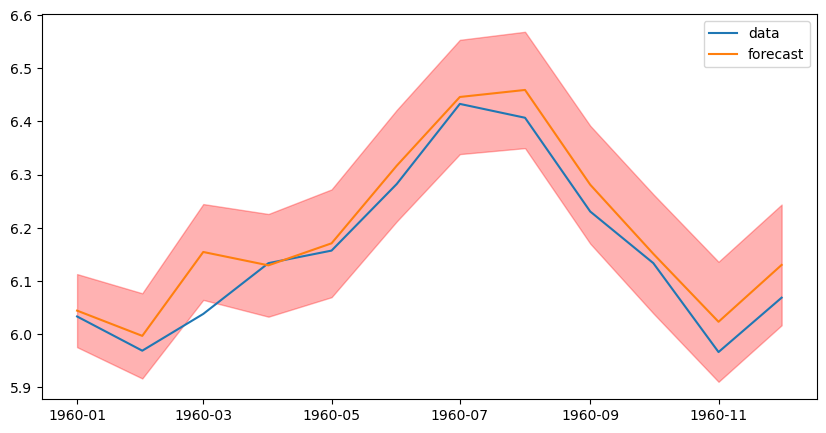

In [52]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

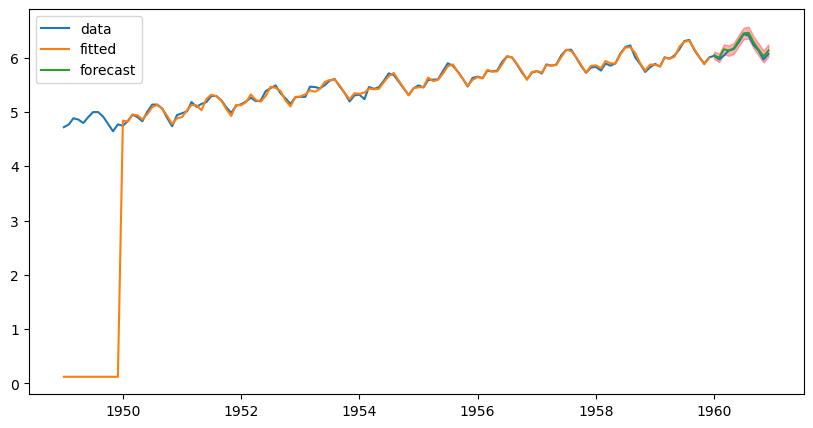

In [53]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

In [54]:
#RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [55]:
print("Non-logged RMSE:", rmse(test['#Passengers'], test_pred))
print("Logged RMSE:", rmse(test['#Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468798006823
Logged RMSE: 23.06076576973839


In [56]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False, #grid search
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-213.706, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.912, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-211.982, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.226, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 167.387
Date:                Sun, 28 Apr 2024   AIC                           -304.774
Time:                        17:49:37   BIC                           -261.531
Sample:                    01-01-1949   HQIC                          -287.202
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0486      0.082      0.593      0.553      -0.112       0.209
ar.L2          0.1900      0.096      1.973      0.048       0.001       0.379
ar.L3          0.1041      0.098      1.059      0.290      -0.089       0.297
ar.L4         -0.1050      0.079     -1.325      0.185      -0.260       0.050
ar.L5          0.0430      0.078      0.555      0.579      -0.109       0.195
ar.L6          0.0710      0.080      0.884      0.377      -0.086       0.228
ar.L7         -0.0361      0.085     -0.425      0.671      -0.203       0.130
ar.L8         -0.1043      0.084     -1.235      0.217      -0.270       0.061
ar.L9         -0.0024      0.080     -0.030      0.976      -0.160       0.155
ar.L10         0.1019      0.076      1.343      0.179      -0.047       0.251
ar.L11        -0.0829      0.080     -1.032      0.302      -0.240       0.075
ar.L12         0.7719      0.081      9.540      0.000       0.613       0.930
ma.L1          0.9585      0.099      9.730      0.000       0.765       1.152
ma.L2          0.6256      0.084      7.472      0.000       0.462       0.790
sigma2         0.0038      0.001      6.751      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   4.15   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.04   Prob(JB):                         0.59
Heteroskedasticity (H):               0.50   Skew:                             0.22
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

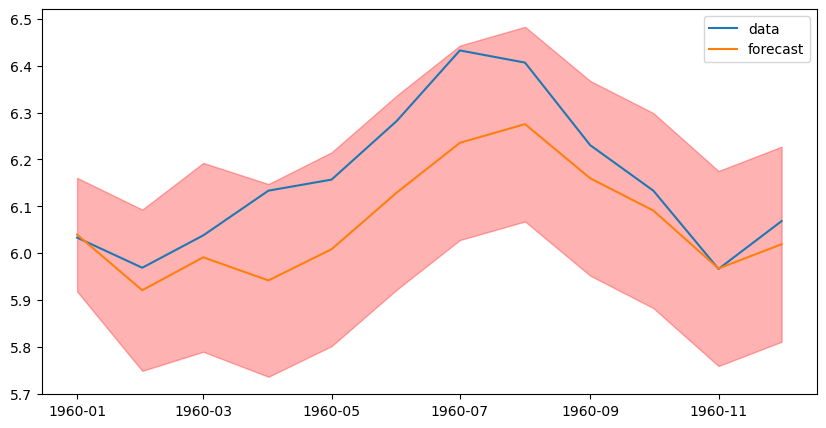

In [58]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

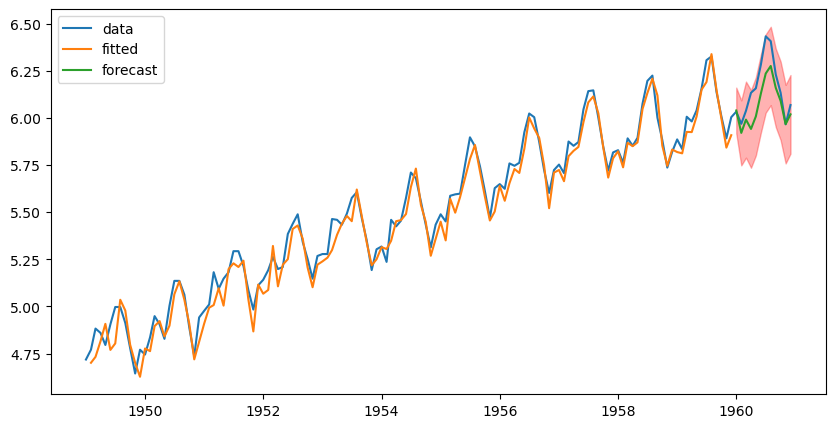

In [59]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

In [60]:
rmse(test['#Passengers'], np.exp(test_pred))

55.66998490951103

In [61]:
### non-seasonal non-logged
model = pm.auto_arima(train['#Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.41 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Sun, 28 Apr 2024   AIC                           1020.062
Time:                        17:50:27   BIC                           1066.065
Sample:                    01-01-1949   HQIC                          1038.755
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.023      2.020      0.043       0.182      12.030
ar.L1         -0.0766      0.143     -0.536      0.592      -0.357       0.204
ar.L2         -0.2993      0.142     -2.113      0.035      -0.577      -0.022
ar.L3         -0.1340      0.117     -1.149      0.251      -0.363       0.095
ar.L4         -0.2843      0.115     -2.482      0.013      -0.509      -0.060
ar.L5         -0.0920      0.116     -0.791      0.429      -0.320       0.136
ar.L6         -0.3053      0.112     -2.716      0.007      -0.526      -0.085
ar.L7         -0.1006      0.124     -0.814      0.416      -0.343       0.142
ar.L8         -0.3147      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0835      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3179      0.129     -2.470      0.014      -0.570      -0.066
ar.L11        -0.0756      0.130     -0.583      0.560      -0.330       0.178
ar.L12         0.6366      0.126      5.059      0.000       0.390       0.883
ma.L1         -0.0960      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2345      0.185      1.266      0.205      -0.128       0.597
sigma2        97.8895     15.342      6.381      0.000      67.820     127.959
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

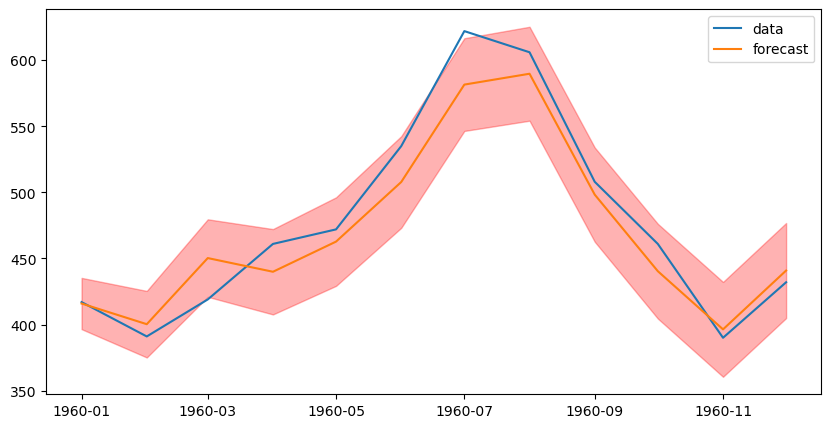

In [63]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['#Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

In [64]:
rmse(test['#Passengers'], test_pred)

20.15080615546784